### Analyzing Sinhala Dataset

Link: http://www.openslr.org/52/

Contains 16 zip files, each close to 900 MB. Thanks Google for making it open source.

In [34]:
import os
import random
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys

import torchaudio
from torchaudio.transforms import MelSpectrogram

In [ ]:
os.path.abspath(os.path.join(''))

'/home/computermaestro/shastra_ASR/Code/Speech_To_Text/Sinhala'

In [2]:
data_dir = '../../../Dataset/Sinhala/'

In [3]:
# reading the main transcript
data_df = pd.read_csv(os.path.join(data_dir, 'utt_spk_text.tsv'), 
                      delimiter='\t', names=['id', 'speaker_id', 'sent'])
print(data_df.shape)
data_df.head(10)

(155970, 3)


,id,speaker_id,sent
0,0000f47c22,7ab05,මහවැලි ගඟට ගොස් ආපසු එන ගමනේදී
1,000101700f,44e28,උන්වහන්සේ කපාපු
2,000107b539,b1a64,එය එතනින් අවසන් නොවී
3,00016825d3,2fff2,සිතින් අයහපතෙහි හැසිරීම නිසයි.
4,000171b8fd,d6ccd,එවන් ශ්‍රේෂ්ඨ ජාතියක් බිහි කිරීමට
5,00018c30ff,88c80,day offices
6,0002205a57,ccf7a,ඊට අවසරයද හිමිවූ බව ඇය කියන්නීය.
7,00027ad5ee,0a2fe,යම්කිසි මනුෂ්‍යයෙක් සිල් රකිනවානම්
8,000285f6ac,bced5,ඒක නිසාම මම
9,0002dd5edb,f3efc,අපි පෘථිවියට ඉහලින් අභ්‍යවකාශයේ රඳවා තිබෙන උපක...


tensor(-8.0205, grad_fn=<MeanBackward0>)
tensor(9.3017, grad_fn=<MaxBackward1>)
tensor(-25.8302, grad_fn=<MinBackward1>)
Sentence පෙර සියල්ල හීනයක් වෙන්නට ඇති බවය.


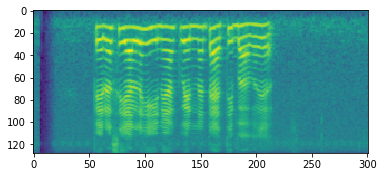

In [32]:
# play an audio
idx = random.randint(0, data_df.shape[0])
id_, _, sent = data_df.iloc[idx]

specgram = MelSpectrogram(n_fft=1024, hop_length=256)
filepath = os.path.join(data_dir, id_+'.flac')
waveform, sample_rate = torchaudio.load(filepath)
x = specgram(waveform).log2()

print(x.mean())
print(x.max())
print(x.min())
print('Sentence', sent)
plt.imshow(x[0,:,:].detach())
IPython.display.Audio(filepath)

### Cleaning the dataset

In [65]:
idx = random.randint(0, data_df.shape[0])
id_, _, sent = data_df.iloc[idx]
print("Sentence:", sent)
print(list(sent))
for c in sent:
    print(ord(c))

Sentence: බොරු සෝබන පණ්ඩිතකම් දාන්න යන්න එපා.
['බ', 'ො', 'ර', 'ු', ' ', 'ස', 'ෝ', 'බ', 'න', ' ', 'ප', 'ණ', '්', 'ඩ', 'ි', 'ත', 'ක', 'ම', '්', ' ', 'ද', 'ා', 'න', '්', 'න', ' ', 'ය', 'න', '්', 'න', ' ', 'එ', 'ප', 'ා', '.']
3510
3548
3515
3540
32
3523
3549
3510
3505
32
3508
3499
3530
3497
3538
3501
3482
3512
3530
32
3503
3535
3505
3530
3505
32
3514
3505
3530
3505
32
3473
3508
3535
46
